In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
import os
import glob
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
os.chdir("D:/Data")
csv_data_path = 'D:/Data/'

In [8]:
#Create a dataframe and the csv file

files = ['02-14-2018.csv',
        '02-15-2018.csv',
        '02-16-2018.csv',
        '02-20-2018.csv',
        '02-21-2018.csv',
        '02-22-2018.csv',
        '02-23-2018.csv',
        '02-28-2018.csv',
        '03-01-2018.csv',
        '03-02-2018.csv']


In [21]:
def fusionfiles(files):
    dfs = []
    for i in range (10):
        df = pd.read_csv(files[i],nrows=10000)
        df = df[['URG Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','Protocol','Pkt Size Avg','Flow Pkts/s','FIN Flag Cnt','ECE Flag Cnt','ACK Flag Cnt','Dst Port','Label']]
        dfs.append(df)
    return dfs

In [22]:
dfs = []
dfs = fusionfiles(files)


C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [4]:
dfs[5].info()

NameError: name 'dfs' is not defined

In [24]:
column_names = ["Dst Port","Protocol","Timestamp","Flow Duration","Tot Fwd Pkts","Tot Bwd Pkts","TotLen Fwd Pkts",
            "TotLen Bwd Pkts","Fwd Pkt Len Max","Fwd Pkt Len Min","Fwd Pkt Len Mean","Fwd Pkt Len Std","Bwd Pkt Len Max",
            "Bwd Pkt Len Min","Bwd Pkt Len Mean","Bwd Pkt Len Std","Flow Byts/s","Flow Pkts/s","Flow IAT Mean","Flow IAT Std",
            "Flow IAT Max","Flow IAT Min","Fwd IAT Tot","Fwd IAT Mean","Fwd IAT Std","Fwd IAT Max","Fwd IAT Min","Bwd IAT Tot",
            "Bwd IAT Mean","Bwd IAT Std","Bwd IAT Max","Bwd IAT Min","Fwd PSH Flags","Bwd PSH Flags","Fwd URG Flags",
            "Bwd URG Flags","Fwd Header Len","Bwd Header Len","Fwd Pkts/s","Bwd Pkts/s","Pkt Len Min","Pkt Len Max",
            "Pkt Len Mean","Pkt Len Std","Pkt Len Var","FIN Flag Cnt","SYN Flag Cnt","RST Flag Cnt","PSH Flag Cnt",
            "ACK Flag Cnt","URG Flag Cnt","CWE Flag Count","ECE Flag Cnt","Down/Up Ratio","Pkt Size Avg",
            "Fwd Seg Size Avg","Bwd Seg Size Avg","Fwd Byts/b Avg","Fwd Pkts/b Avg","Fwd Blk Rate Avg",
            "Bwd Byts/b Avg","Bwd Pkts/b Avg","Bwd Blk Rate Avg","Subflow Fwd Pkts","Subflow Fwd Byts",
            "Subflow Bwd Pkts","Subflow Bwd Byts","Init Fwd Win Byts","Init Bwd Win Byts","Fwd Act Data Pkts",
            "Fwd Seg Size Min","Active Mean","Active Std","Active Max","Active Min","Idle Mean","Idle Std","Idle Max",
            "Idle Min","Label"
]

In [33]:
'''
for i in range (10):
        dfs[i].dropna()
        dfs[i].fillna(df.median(), inplace=True)
        '''
df = pd.DataFrame()
df = pd.concat([dfs[0], dfs[1],dfs[2],dfs[3],dfs[4],dfs[5],dfs[6],dfs[7],dfs[8],dfs[9]])
df["URG Flag Cnt"] = pd.to_numeric(df["URG Flag Cnt"], errors='coerce')
df["SYN Flag Cnt"] = pd.to_numeric(df["SYN Flag Cnt"], errors='coerce')
df["RST Flag Cnt"] = pd.to_numeric(df["RST Flag Cnt"], errors='coerce')
df["PSH Flag Cnt"] = pd.to_numeric(df["PSH Flag Cnt"], errors='coerce')
df["Protocol"] = pd.to_numeric(df["Protocol"], errors='coerce')
df["Pkt Size Avg"] = pd.to_numeric(df["Pkt Size Avg"], errors='coerce')
df["Flow Pkts/s"] = pd.to_numeric(df["Flow Pkts/s"], errors='coerce')
df["FIN Flag Cnt"] = pd.to_numeric(df["PSH Flag Cnt"], errors='coerce')
df["ECE Flag Cnt"] = pd.to_numeric(df["ECE Flag Cnt"], errors='coerce')
df["ACK Flag Cnt"] = pd.to_numeric(df["ACK Flag Cnt"], errors='coerce')
df["Dst Port"] = pd.to_numeric(df["Dst Port"], errors='coerce')
df.to_csv (r'export_dataframe.csv', index = False, header=True)


In [9]:
 df = pd.read_csv('export_dataframe.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   URG Flag Cnt  99999 non-null   float64
 1   SYN Flag Cnt  99999 non-null   float64
 2   RST Flag Cnt  99999 non-null   float64
 3   PSH Flag Cnt  99999 non-null   float64
 4   Protocol      99999 non-null   float64
 5   Pkt Size Avg  99999 non-null   float64
 6   Flow Pkts/s   99999 non-null   float64
 7   FIN Flag Cnt  99999 non-null   float64
 8   ECE Flag Cnt  99999 non-null   float64
 9   ACK Flag Cnt  99999 non-null   float64
 10  Dst Port      99999 non-null   float64
 11  Label         100000 non-null  object 
dtypes: float64(11), object(1)
memory usage: 8.8+ MB


In [11]:
sample_data = pd.read_csv("export_dataframe.csv")
sample_data.to_pickle('export_dataframe.pkl')
df = pd.read_pickle('export_dataframe.pkl')
#df = df[['URG Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','Protocol','Pkt Size Avg','Flow Pkts/s','FIN Flag Cnt','ECE Flag Cnt','ACK Flag Cnt','Dst Port','Label']]
#df["URG Flag Cnt","SYN Flag Cnt","RST Flag Cnt","PSH Flag Cnt","Protocol","Pkt Size Avg","Flow Pkts/s","FIN Flag Cnt","ECE Flag Cnt","ACK Flag Cnt","Dst Port","Label"] = pd.to_numeric(df["URG Flag Cnt","SYN Flag Cnt","RST Flag Cnt","PSH Flag Cnt","Protocol","Pkt Size Avg","Flow Pkts/s","FIN Flag Cnt","ECE Flag Cnt","ACK Flag Cnt","Dst Port","Label"], errors='coerce')
df.dropna(inplace=True)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URG Flag Cnt  99999 non-null  float64
 1   SYN Flag Cnt  99999 non-null  float64
 2   RST Flag Cnt  99999 non-null  float64
 3   PSH Flag Cnt  99999 non-null  float64
 4   Protocol      99999 non-null  float64
 5   Pkt Size Avg  99999 non-null  float64
 6   Flow Pkts/s   99999 non-null  float64
 7   FIN Flag Cnt  99999 non-null  float64
 8   ECE Flag Cnt  99999 non-null  float64
 9   ACK Flag Cnt  99999 non-null  float64
 10  Dst Port      99999 non-null  float64
 11  Label         99999 non-null  object 
dtypes: float64(11), object(1)
memory usage: 9.5+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URG Flag Cnt  99999 non-null  float64
 1   SYN Flag Cnt  99999 non-null  float64
 2   RST Flag Cnt  99999 non-null  float64
 3   PSH Flag Cnt  99999 non-null  float64
 4   Protocol      99999 non-null  float64
 5   Pkt Size Avg  99999 non-null  float64
 6   Flow Pkts/s   99999 non-null  float64
 7   FIN Flag Cnt  99999 non-null  float64
 8   ECE Flag Cnt  99999 non-null  float64
 9   ACK Flag Cnt  99999 non-null  float64
 10  Dst Port      99999 non-null  float64
 11  Label         99999 non-null  object 
dtypes: float64(11), object(1)
memory usage: 9.5+ MB


In [13]:
train = df.groupby('Label').apply(pd.DataFrame.sample, frac=0.8).reset_index(level='Label', drop=True)
test = df.drop(train.index)
label = train.Label.copy()

In [14]:
label.unique()

array(['Benign', 'Bot', 'Brute Force -Web', 'Brute Force -XSS',
       'DDOS attack-HOIC', 'DDOS attack-LOIC-UDP',
       'DDoS attacks-LOIC-HTTP', 'DoS attacks-GoldenEye',
       'DoS attacks-SlowHTTPTest', 'FTP-BruteForce', 'SQL Injection'],
      dtype=object)

In [15]:
d1 = train.replace('Benign', 0)
d2 = d1.replace('Bot', 1)
d3 = d2.replace('Brute Force -Web', 1)
d4 = d3.replace('Brute Force -XSS', 1)
d5 = d4.replace('DDOS attack-HOIC', 1)
d6 = d5.replace('DDOS attack-LOIC-UDP', 1)
d7 = d6.replace('DDoS attacks-LOIC-HTTP', 1)
d8 = d7.replace('DoS attacks-GoldenEye', 1)
d9 = d8.replace('DoS attacks-SlowHTTPTest', 1)
d10 = d9.replace('FTP-BruteForce', 1)
d11 = d10.replace('SQL Injection', 1)

In [16]:
d12_label = d11.Label.copy()
d12_label.unique()

array([0, 1], dtype=int64)

In [17]:
d12_label.value_counts()

1    45533
0    34466
Name: Label, dtype: int64

In [18]:
test_label = test.Label.copy() #ra kanggo
test_label.unique() #ra kanggo
a1_label = test.Label.copy()
a1_label.unique()

array(['Benign', 'FTP-BruteForce', 'DoS attacks-GoldenEye',
       'DoS attacks-SlowHTTPTest', 'DDoS attacks-LOIC-HTTP',
       'DDOS attack-LOIC-UDP', 'DDOS attack-HOIC', 'Brute Force -Web',
       'Brute Force -XSS', 'SQL Injection', 'Bot'], dtype=object)

In [19]:
a1 = test.replace('Benign', 0)
a2 = a1.replace('Bot', 1)
a3 = a2.replace('Brute Force -Web', 1)
a4 = a3.replace('Brute Force -XSS', 1)
a5 = a4.replace('DDOS attack-HOIC', 1)
a6 = a5.replace('DDOS attack-LOIC-UDP', 1)
a7 = a6.replace('DDoS attacks-LOIC-HTTP', 1)
a8 = a7.replace('DoS attacks-GoldenEye', 1)
a9 = a8.replace('DoS attacks-SlowHTTPTest', 1)
a10 = a9.replace('FTP-BruteForce', 1)
a11 = a10.replace('SQL Injection', 1)
a12_label = a11.Label.copy()
a12_label.unique()
a12_label.value_counts()

1    11383
0     8617
Name: Label, dtype: int64

In [20]:
category_variables = ["Protocol"]

for cv in category_variables:
    d11[cv] = d11[cv].astype("category")
    a11[cv] = a11[cv].astype("category")
    
    print("Length of Categories for {} are {}".format(cv , len(d11[cv].cat.categories)))
    print("Categories for {} are {} \n".format(cv ,d11[cv].cat.categories))

Length of Categories for Protocol are 3
Categories for Protocol are Float64Index([0.0, 6.0, 17.0], dtype='float64') 



In [21]:
dummy_variables_2labels = category_variables
    
class preprocessing:
    train_labels = pd.get_dummies(d11, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    test_labels = pd.get_dummies(a11, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)

In [22]:
d11.head()

,URG Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,Protocol,Pkt Size Avg,Flow Pkts/s,FIN Flag Cnt,ECE Flag Cnt,ACK Flag Cnt,Dst Port,Label
42620,0.0,0.0,0.0,0.0,17.0,35.200000,0.088493,0.0,0.0,0.0,80.0,0
62780,0.0,0.0,0.0,1.0,6.0,0.000000,95238.095238,1.0,0.0,0.0,23.0,0
65987,0.0,0.0,0.0,1.0,6.0,0.000000,46.089321,1.0,0.0,0.0,445.0,0
59158,0.0,0.0,0.0,1.0,6.0,0.000000,16.422991,1.0,0.0,0.0,445.0,0
70022,0.0,0.0,1.0,1.0,6.0,339.384615,137.032508,1.0,1.0,0.0,443.0,0


In [23]:
preprocessing.test_labels.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 99995
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URG Flag Cnt   20000 non-null  float64
 1   SYN Flag Cnt   20000 non-null  float64
 2   RST Flag Cnt   20000 non-null  float64
 3   PSH Flag Cnt   20000 non-null  float64
 4   Pkt Size Avg   20000 non-null  float64
 5   Flow Pkts/s    20000 non-null  float64
 6   FIN Flag Cnt   20000 non-null  float64
 7   ECE Flag Cnt   20000 non-null  float64
 8   ACK Flag Cnt   20000 non-null  float64
 9   Dst Port       20000 non-null  float64
 10  Label          20000 non-null  int64  
 11  Protocol_0.0   20000 non-null  uint8  
 12  Protocol_6.0   20000 non-null  uint8  
 13  Protocol_17.0  20000 non-null  uint8  
dtypes: float64(10), int64(1), uint8(3)
memory usage: 1.9 MB


In [57]:
preprocessing.train_labels.to_csv("D:/Data/preprocessed_train_2018.csv")
preprocessing.test_labels.to_csv("D:/Data/preprocessed_test_2018.csv")

In [2]:
traindata = pd.read_csv('D:/Data/preprocessed_train_2018.csv')
testdata = pd.read_csv('D:/Data/preprocessed_train_2018.csv')
traindata.pop("Unnamed: 0")
testdata.pop("Unnamed: 0")

traindata.head()

,URG Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,Pkt Size Avg,Flow Pkts/s,FIN Flag Cnt,ECE Flag Cnt,ACK Flag Cnt,Dst Port,Label,Protocol_0.0,Protocol_6.0,Protocol_17.0
0,0.0,0.0,0.0,0.0,34.909091,0.100906,0.0,0.0,0.0,80.0,0,0,0,1
1,0.0,0.0,0.0,1.0,222.857143,0.462527,1.0,0.0,0.0,443.0,0,0,1,0
2,1.0,0.0,0.0,0.0,0.000000,181818.181800,0.0,0.0,1.0,50519.0,0,0,1,0
3,0.0,0.0,0.0,0.0,34.461538,0.115077,0.0,0.0,0.0,80.0,0,0,0,1
4,0.0,0.0,0.0,1.0,92.714286,10057.471264,1.0,0.0,0.0,80.0,0,0,1,0


In [3]:
Y = traindata.pop('Label')
X = traindata.iloc[:,0:13]
C = testdata.pop('Label')
T = testdata.iloc[:,0:13]

X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   URG Flag Cnt   79999 non-null  float64
 1   SYN Flag Cnt   79999 non-null  float64
 2   RST Flag Cnt   79999 non-null  float64
 3   PSH Flag Cnt   79999 non-null  float64
 4   Pkt Size Avg   79999 non-null  float64
 5   Flow Pkts/s    79999 non-null  float64
 6   FIN Flag Cnt   79999 non-null  float64
 7   ECE Flag Cnt   79999 non-null  float64
 8   ACK Flag Cnt   79999 non-null  float64
 9   Dst Port       79999 non-null  float64
 10  Protocol_0.0   79999 non-null  int64  
 11  Protocol_6.0   79999 non-null  int64  
 12  Protocol_17.0  79999 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 7.9 MB


In [4]:
_traindata = np.array(X)
_trainlabel = np.array(Y)
_traindata = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testdata = np.array(T)
_testlabel = np.array(C)
_testdata = T.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
_testlabel

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# 5. Declare data preprocessing steps
pipeline = make_pipeline(RandomForestClassifier())

# Add a dict of estimator and estimator related parameters in this list
hyperparameters = {
                'randomforestclassifier__n_estimators': [25,50,75,100],
                'randomforestclassifier__max_features' : [None, "log2", "auto"]
                }

In [10]:
clf = GridSearchCV(pipeline, hyperparameters, cv=5,verbose=1,n_jobs=-1)
clf.fit(_traindata, _trainlabel)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_features': [None, 'log2',
                                                                  'auto'],
                         'randomforestclassifier__n_estimators': [25, 50, 75,
                                                                  100]},
             verbose=1)

In [63]:
print(clf.best_params_)
print(clf.best_estimator_)
# print(clf.cv_results_ )

{'randomforestclassifier__max_features': None, 'randomforestclassifier__n_estimators': 25}
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_features=None, n_estimators=25))])


In [64]:
print(clf.best_score_)

0.8874874234327146


In [65]:
print (clf.refit)
 
# 9. Evaluate model pipeline on test data
pred = clf.predict(_testdata)


from sklearn.metrics import accuracy_score
print(accuracy_score(_testlabel, pred))

True
0.9969124614057676


In [66]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(_testlabel, pred)
print(classification_report(_testlabel, pred))
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34466
           1       1.00      1.00      1.00     45533

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999

[[34446    20]
 [  227 45306]]


In [69]:
#  Save model for future use
from joblib import dump, load
dump(clf, 'rf_intrusion_detection.pkl')

['rf_intrusion_detection.pkl']

In [ ]:
#Pour réouvrir le modele 
#clf = load('filename.joblib') 

In [23]:
##Decision tree
from sklearn import tree
from sklearn.model_selection import cross_val_score
'''
# 5. Declare data preprocessing steps
pipeline = make_pipeline(tree.DecisionTreeClassifier())

# Add a dict of estimator and estimator related parameters in this list
hyperparameters = {
                'randomforestclassifier__n_estimators': [25,50,75,100],
                'randomforestclassifier__max_features' : [None, "log2", "auto"]
                }
clf = GridSearchCV(pipeline, hyperparameters, cv=5,verbose=1,n_jobs=-1)
'''
depth = []
for i in range(3,20):
    clfDT = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clfDT, X=_traindata, y=_trainlabel, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
    
print(depth)


[(3, 0.8881008043314932), (4, 0.9091008382775424), (5, 0.9340880914463082), (6, 0.9464383578790454), (7, 0.9233147150401531), (8, 0.9260024117664015), (9, 0.9288524273969408), (10, 0.9291524358351086), (11, 0.9294774488046302), (12, 0.9293649191165481), (13, 0.9294024111477689), (14, 0.9292649119287708), (15, 0.9292024186474876), (16, 0.9292524123975033), (17, 0.9292774136475658), (18, 0.9292649152100619), (19, 0.9290149027094368)]


In [16]:

clfDT = tree.DecisionTreeClassifier(max_depth=6,min_samples_leaf=6)
clfDT = clfDT.fit(_traindata, _trainlabel)

In [17]:
predDT = clfDT.predict(_testdata)
from sklearn.metrics import accuracy_score
print(accuracy_score(_testlabel, predDT))

0.9853873173414668


In [18]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(_testlabel, predDT)
print(classification_report(_testlabel, predDT))
print(cm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     34466
           1       0.98      0.99      0.99     45533

    accuracy                           0.99     79999
   macro avg       0.99      0.98      0.99     79999
weighted avg       0.99      0.99      0.99     79999

[[33671   795]
 [  374 45159]]


In [19]:
#  Save model for future use
from joblib import dump, load
dump(clfDT, 'dt_intrusion_detection.pkl')

['dt_intrusion_detection.pkl']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Decision Tree Classifier Results
Confusion Matrix:
[[34459     7]
 [  232 45301]]
Error Value:0.0029875373442167508
Accuracy_Score:0.9970124626557832



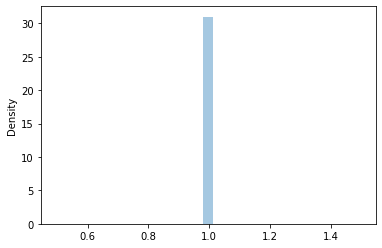

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
model_accuracies = []
for i in range(1000):
    DTclassifier = DecisionTreeClassifier(random_state=10)
    DTclassifier.fit(_traindata, _trainlabel)
    classifier_accuracy = DTclassifier.score(_testdata, _testlabel)
    model_accuracies.append(classifier_accuracy)
sns.distplot(model_accuracies)

pred_y = DTclassifier.predict(_testdata)

results = confusion_matrix(_testlabel, pred_y)
error = zero_one_loss(_testlabel, pred_y)
accuracy_score = accuracy_score(_testlabel, pred_y)

print("Decision Tree Classifier Results\n======================\nConfusion Matrix:\n{}\nError Value:{}\nAccuracy_Score:{}\n".format(results, error, accuracy_score))

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average score: 0.9894374031128891')

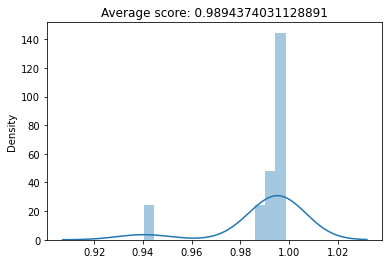

In [26]:

dtc = DecisionTreeClassifier()
cv_scores = cross_val_score(dtc, _traindata, _trainlabel, cv=10)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
dtc = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold( n_splits=10)

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(_testdata, _testlabel)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
dtc

Best score: 0.89342472184023
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 4, 'splitter': 'best'}


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average score: 0.8181617913619601')

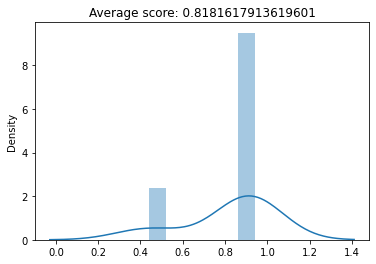

In [37]:
cv_scores = cross_val_score(dtc, _testdata, _testlabel)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

ModuleNotFoundError: No module named 'genetic_selection'

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clfSVM = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clfSVM.fit(_traindata, _trainlabel)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
predSVM = clfSVM.predict(_testdata)
results = confusion_matrix(_testlabel, predSVM)
error = zero_one_loss(_testlabel, predSVM)
accuracy_score = accuracy_score(_testlabel, predSVM)
print("Decision Tree Classifier Results\n======================\nConfusion Matrix:\n{}\nError Value:{}\nAccuracy_Score:{}\n".format(results, error, accuracy_score))

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

paramgrid = {"kernel": ["rbf", "sigmoid", "linear"],
             "C": np.logspace(-9, 9, num=25, base=10),
             "gamma": np.logspace(-9, 9, num=25, base=10)}
print("Size: ", len(paramgrid["kernel"]) * len(paramgrid["C"]) * len(paramgrid["gamma"]))

cv = GeneticSearchCV(estimator=SVC(),
                     params=paramgrid,
                     scoring="accuracy",
                     cv=StratifiedKFold(n_splits=2),
                     verbose=True,
                     population_size=50,
                     gene_mutation_prob=0.10,
                     tournament_size=3,
                     generations_number=10)

print(cv.fit(_traindata, _trainlabel))
print(cv.best_score_, cv.best_params_)

print(pd.DataFrame(cv.cv_results_).sort_values("mean_test_score", ascending=False).head())